In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head(7)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10,96.0,0.0,75.0,0
1,1.0,gasoline,10,96.0,0.0,72.0,1
2,1.0,gasoline,10,96.0,2.6,70.0,1
3,1.0,gasoline,10,96.0,3.2,68.0,1
4,NaN,gasoline,10,109.0,4.5,67.0,1
5,1.0,gasoline,10,109.0,7.8,66.0,1
6,1.0,gasoline,10,103.0,9.7,65.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       16919 non-null  float64
 1   FUEL       16920 non-null  object 
 2   DISTANCE   16920 non-null  object 
 3   DESIBEL    16919 non-null  float64
 4   AIRFLOW    16919 non-null  float64
 5   FREQUENCY  16919 non-null  float64
 6   STATUS     17442 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 954.0+ KB


In [5]:
df['DISTANCE'].unique()

array([10, 20, nan, 30, 40, 50, 60, 70, '$$', 80, 90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190], dtype=object)

In [6]:
for i in df.columns:
    print(df[i],"==",df[i].nunique())

0        1.0
1        1.0
2        1.0
3        1.0
4        NaN
        ... 
17437    7.0
17438    7.0
17439    7.0
17440    7.0
17441    7.0
Name: SIZE, Length: 17442, dtype: float64 == 7
0        gasoline
1        gasoline
2        gasoline
3        gasoline
4        gasoline
           ...   
17437         lpg
17438         lpg
17439         lpg
17440         lpg
17441         lpg
Name: FUEL, Length: 17442, dtype: object == 5
0         10
1         10
2         10
3         10
4         10
        ... 
17437    190
17438    190
17439    190
17440    190
17441    190
Name: DISTANCE, Length: 17442, dtype: object == 20
0         96.0
1         96.0
2         96.0
3         96.0
4        109.0
         ...  
17437     86.0
17438     84.0
17439     80.0
17440     76.0
17441     72.0
Name: DESIBEL, Length: 17442, dtype: float64 == 39
0        0.0
1        0.0
2        2.6
3        3.2
4        4.5
        ... 
17437    2.2
17438    2.0
17439    1.5
17440    0.4
17441    0.0
Name: AIRFLOW

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].unique()} unique values")

SIZE: [ 1. nan  2.  3.  4.  5.  6.  7.] unique values
FUEL: ['gasoline' nan '%%' 'thinner' 'kerosene' 'lpg'] unique values
DISTANCE: [10 20 nan 30 40 50 60 70 '$$' 80 90 100 110 120 130 140 150 160 170 180
 190] unique values
DESIBEL: [ 96. 109. 103.  95. 102.  93. 110. 111. 105.  nan 108. 107. 106.  90.
  92.  91.  88.  85.  83.  75. 104. 112. 113.  89. 100.  87.  80.  78.
  76. 101.  86.  97.  94.  84.  82.  98.  79.  74.  99.  72.] unique values
AIRFLOW: [ 0.   2.6  3.2  4.5  7.8  9.7 12.  13.3 15.4 15.1 15.2 16.  15.7 15.5
 14.9  nan 17.  16.6 14.5 13.8 14.4 12.3 11.9 12.5 12.9 11.8 11.   8.8
  6.   3.1  0.8  1.   1.1  4.   6.5  7.5  9.  15.  14.6 16.3 14.8 14.1
 13.5 12.8 13.6 13.2 11.5 11.2 12.2  9.6  5.   3.7  0.4  7.  16.1 14.2
 11.6 10.9 10.3 10.7 10.  11.3 10.2  9.2  7.4  1.3 13.9 13.1 10.4  2.8
  6.4 13.4 14.3 10.6  9.9 10.5  9.3  8.3  5.8  4.4  9.5 12.6 14.   8.6
  3.4  1.9  7.2 13.   8.1  3.8  2.   8.2  7.7  7.9  8.5  2.1  2.5  6.1
  8.9  1.5  5.4  4.9  5.7  9.1  5.6  4.6 

In [8]:
import numpy as np
df['FUEL'].replace('%%', np.nan, inplace=True)
df['DISTANCE'].replace('$$', np.nan, inplace=True)

In [9]:
df['DISTANCE'] = pd.to_numeric(df['DISTANCE'], errors='coerce')

In [10]:
df['SIZE'].fillna(df['SIZE'].median(), inplace=True)
df['FUEL'].fillna(df['FUEL'].mode()[0], inplace=True)
df['DISTANCE'].fillna(df['DISTANCE'].median(), inplace=True)
df['DESIBEL'].fillna(df['DESIBEL'].mean(), inplace=True)
df['AIRFLOW'].fillna(df['AIRFLOW'].mean(), inplace=True)
df['FREQUENCY'].fillna(df['FREQUENCY'].median(), inplace=True)

In [11]:
df['DISTANCE'] = df['DISTANCE'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  float64
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int32  
 3   DESIBEL    17442 non-null  float64
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  float64
 6   STATUS     17442 non-null  int64  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 885.9+ KB


In [13]:
df['FUEL'].value_counts()

FUEL
kerosene    5519
thinner     4973
gasoline    4962
lpg         1988
Name: count, dtype: int64

In [14]:
df.isnull().value_counts()

SIZE   FUEL   DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS
False  False  False     False    False    False      False     17442
Name: count, dtype: int64

In [15]:
for i in df.select_dtypes(include={'int','float'}):
    print(df[i],"==",df[i].describe())

0        1.0
1        1.0
2        1.0
3        1.0
4        3.0
        ... 
17437    7.0
17438    7.0
17439    7.0
17440    7.0
17441    7.0
Name: SIZE, Length: 17442, dtype: float64 == count    17442.000000
mean         3.402763
std          1.727121
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          7.000000
Name: SIZE, dtype: float64
0         10
1         10
2         10
3         10
4         10
        ... 
17437    190
17438    190
17439    190
17440    190
17441    190
Name: DISTANCE, Length: 17442, dtype: int32 == count    17442.000000
mean        99.962734
std         53.907929
min         10.000000
25%         50.000000
50%        100.000000
75%        150.000000
max        190.000000
Name: DISTANCE, dtype: float64
0         96.0
1         96.0
2         96.0
3         96.0
4        109.0
         ...  
17437     86.0
17438     84.0
17439     80.0
17440     76.0
17441     72.0
Name: DESIBEL, Length: 17442, dtype: float64 ==

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

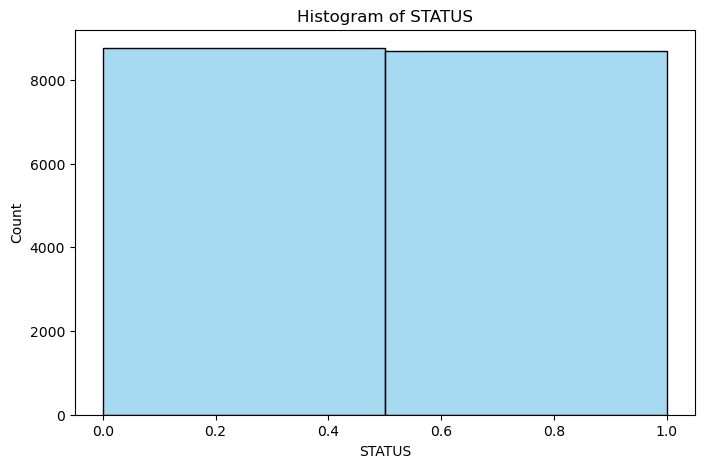

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['STATUS'], bins=2, color='skyblue')
plt.title('Histogram of STATUS')
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.show()

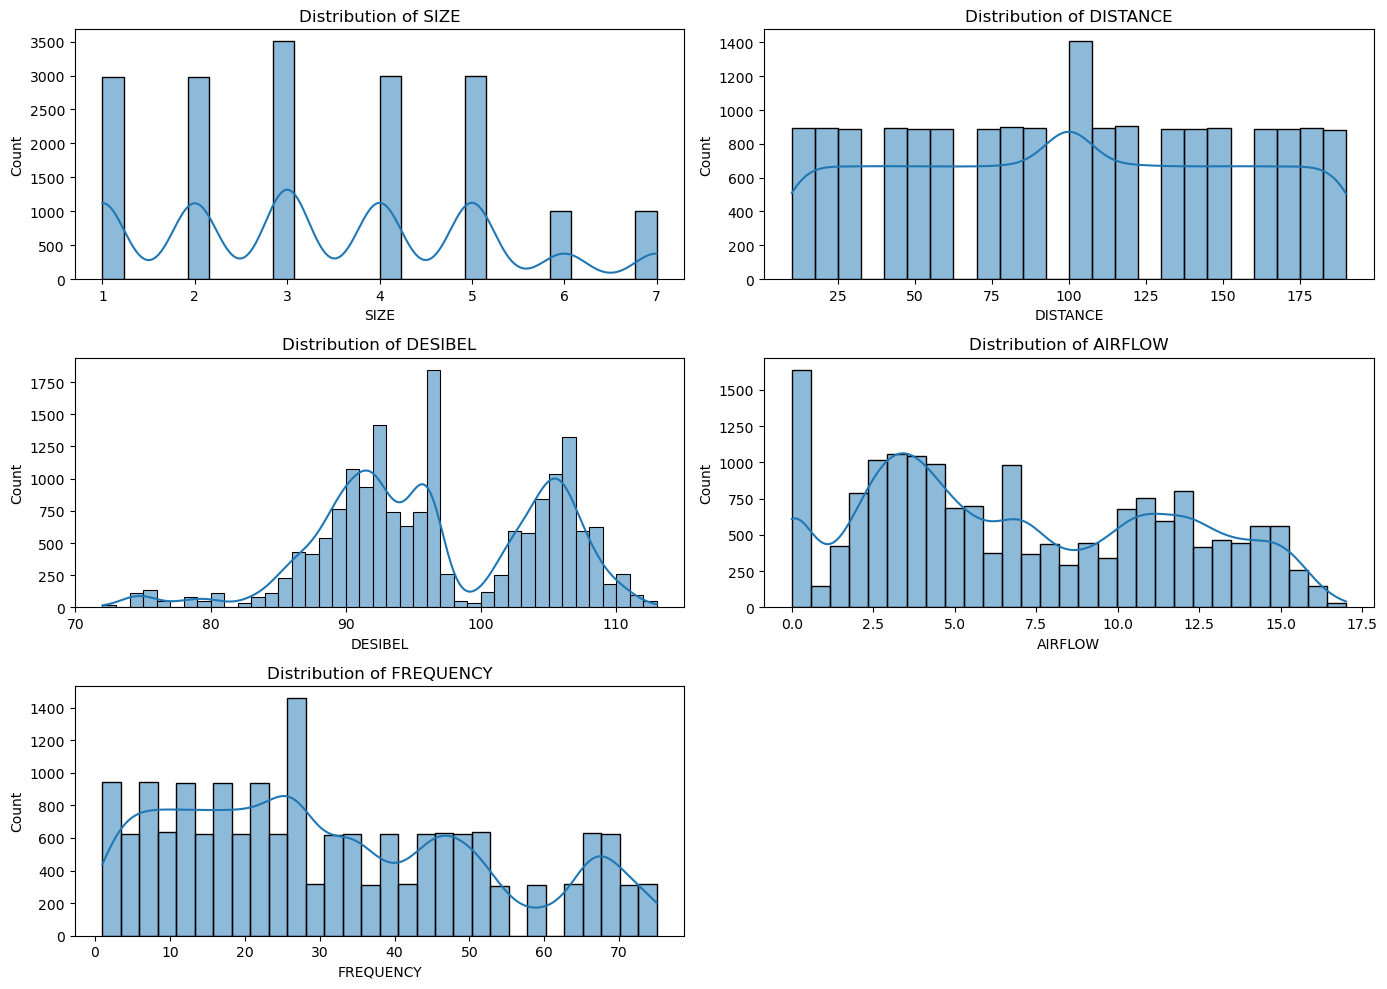

In [18]:
cols = ['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


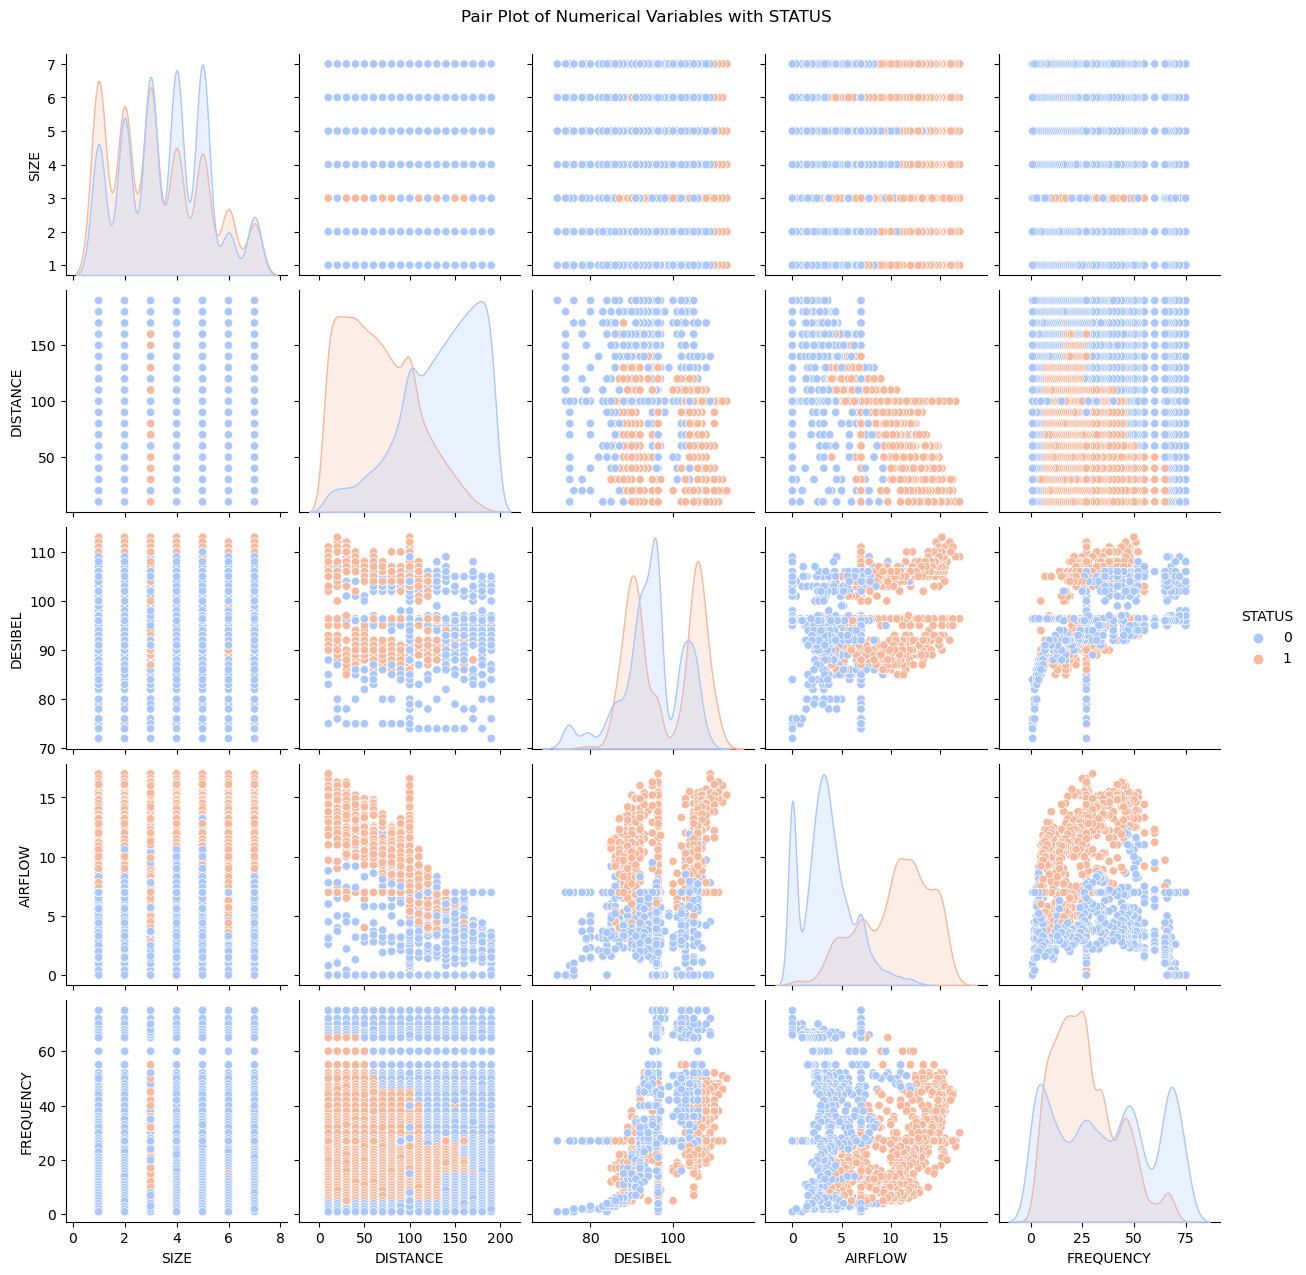

In [19]:

sns.pairplot(df[cols + ['STATUS']], hue='STATUS', palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Variables with STATUS', y=1.02)
plt.show()


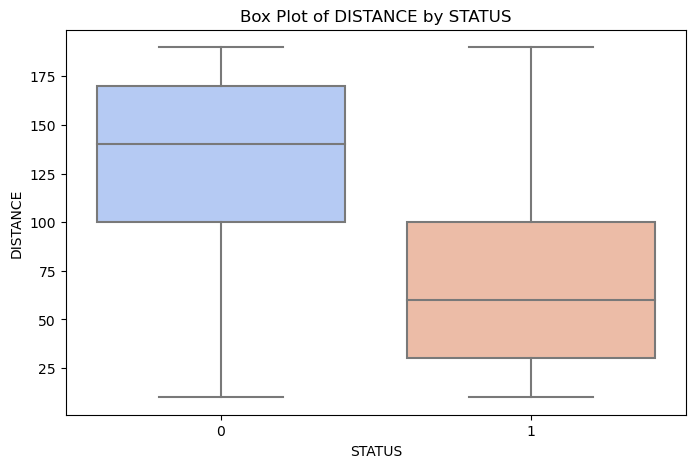

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='STATUS', y='DISTANCE', palette='coolwarm')
plt.title('Box Plot of DISTANCE by STATUS')
plt.xlabel('STATUS')
plt.ylabel('DISTANCE')
plt.show()

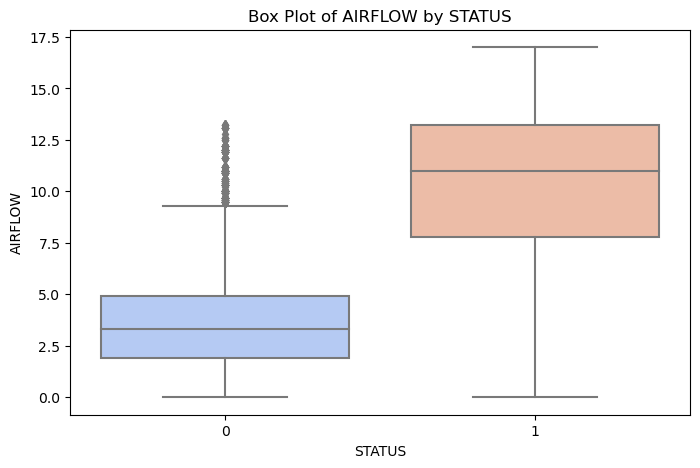

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='STATUS', y='AIRFLOW', palette='coolwarm')
plt.title('Box Plot of AIRFLOW by STATUS')
plt.xlabel('STATUS')
plt.ylabel('AIRFLOW')
plt.show()

In [22]:
cols=df.select_dtypes(include={'int','float'})
corr=cols.corr()

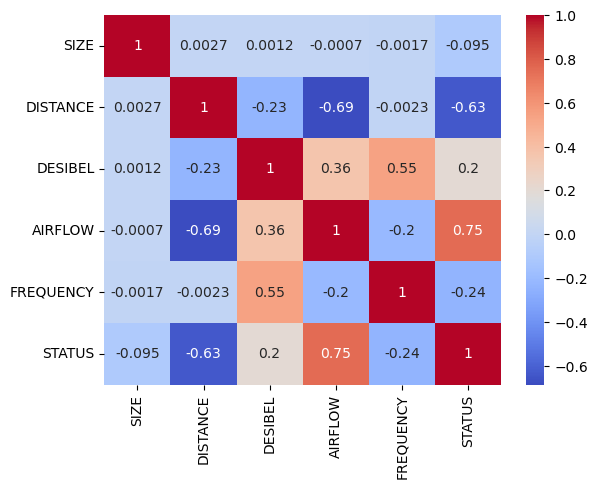

In [23]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
oh = OneHotEncoder()
encoded = oh.fit_transform(df[['FUEL']])

encoded_fuel = pd.DataFrame(encoded.toarray(), columns=oh.get_feature_names_out(['FUEL']))

df_encoded = df.drop(columns=['FUEL']).join(encoded_fuel)

print(df_encoded.head())

   SIZE  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS  FUEL_gasoline  \
0   1.0        10     96.0      0.0       75.0       0            1.0   
1   1.0        10     96.0      0.0       72.0       1            1.0   
2   1.0        10     96.0      2.6       70.0       1            1.0   
3   1.0        10     96.0      3.2       68.0       1            1.0   
4   3.0        10    109.0      4.5       67.0       1            1.0   

   FUEL_kerosene  FUEL_lpg  FUEL_thinner  
0            0.0       0.0           0.0  
1            0.0       0.0           0.0  
2            0.0       0.0           0.0  
3            0.0       0.0           0.0  
4            0.0       0.0           0.0  


In [25]:
df_encoded.head()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1.0,10,96.0,0.0,75.0,0,1.0,0.0,0.0,0.0
1,1.0,10,96.0,0.0,72.0,1,1.0,0.0,0.0,0.0
2,1.0,10,96.0,2.6,70.0,1,1.0,0.0,0.0,0.0
3,1.0,10,96.0,3.2,68.0,1,1.0,0.0,0.0,0.0
4,3.0,10,109.0,4.5,67.0,1,1.0,0.0,0.0,0.0


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix

In [27]:
x=df_encoded.drop(columns='STATUS')
x

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1.0,10,96.0,0.0,75.0,1.0,0.0,0.0,0.0
1,1.0,10,96.0,0.0,72.0,1.0,0.0,0.0,0.0
2,1.0,10,96.0,2.6,70.0,1.0,0.0,0.0,0.0
3,1.0,10,96.0,3.2,68.0,1.0,0.0,0.0,0.0
4,3.0,10,109.0,4.5,67.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
17437,7.0,190,86.0,2.2,5.0,0.0,0.0,1.0,0.0
17438,7.0,190,84.0,2.0,4.0,0.0,0.0,1.0,0.0
17439,7.0,190,80.0,1.5,3.0,0.0,0.0,1.0,0.0
17440,7.0,190,76.0,0.4,2.0,0.0,0.0,1.0,0.0


In [28]:
y=df_encoded['STATUS']
y

0        0
1        1
2        1
3        1
4        1
        ..
17437    0
17438    0
17439    0
17440    0
17441    0
Name: STATUS, Length: 17442, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [30]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[1560,  154],
       [ 191, 1584]], dtype=int64)

In [31]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.89      0.91      0.90      1714\n           1       0.91      0.89      0.90      1775\n\n    accuracy                           0.90      3489\n   macro avg       0.90      0.90      0.90      3489\nweighted avg       0.90      0.90      0.90      3489\n'

In [32]:
score=accuracy_score(y_test,y_pred)
score

0.9011177987962167

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [34]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[1560,  154],
       [ 191, 1584]], dtype=int64)

In [35]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.89      0.91      0.90      1714\n           1       0.91      0.89      0.90      1775\n\n    accuracy                           0.90      3489\n   macro avg       0.90      0.90      0.90      3489\nweighted avg       0.90      0.90      0.90      3489\n'

In [36]:
score=accuracy_score(y_test,y_pred)
score

0.9011177987962167